# Exercise 1: Pattern matching

In this exercise we will be performing an exercise on matching patterns between two images. But first we need to get the task instructions, which are embedded in *another* pair of images that we have to assemble. Handling data often involves reading in multiple files to process together, so this is good practise.

<div class="alert alert-block alert-info">
<h3>This exercise will cover:</h3> 
</div>

 * Finding files and opening files. 
 * Plotting 2D arrays with `matplotlib`. 
 * Handling 2D array-like data structures with `numpy`
 * Using the subscript operator `[ ]` and Python's slices 
 * Looping over a data structure to perform an operation on every element 

<div class="alert alert-block alert-info"></div>

# Formative feedback
Exercise 1 is intended for you to get **formative (unmarked) feedback** to imporve your programming style.  We normally focus on exercise 2 & 3 during the final marking unless there are issues during the lab. So, attempt this exercise on the first day, and make a record as you go along.  On the **first Thursday morning ask a demonstrator to look over it and give you feedback**, which you can use in approaching Exercises 2 & 3.  Then **make a start on Exercises 2 & 3**.  If you have not finished Exercise 1 by the first Thursday morning, it's better to make a start on Exercise 2 & 3 anyway. 

## Part 1: Handling text strings

In much physics work the key information is in numbers, but you will probably spend a good deal of time having to manage text data. Text in Python is represented using character **strings**, specifically of type `str`. "Literal" strings are indicated in code using single or double quotes, but they can also be stored in variables. Like arrays, they support iteration, indexing, slicing, etc. via the square-bracket operators -- as shown below, along with some other features:

In [2]:
# Declaring strings. Either single or double quotes can be used in Python (but they must match).
a = "A string"
b = 'Another string'
print(a)

# You can index characters in a string using the usual syntax.
a[4]

# Slicing works the same as for other iterables as well.
b[2:5]

# Iteration, too.
for letter in a:
    print(letter)

# You can concatenate strings using + and repeat a string using *.
c = a + b
d = a*5
print(d)

# Test if a string contains a substring
if "other" in c:
    print(c)

# Convert a string to a floating-point number and back.
e = str(12./5.); print(e, "(stored as a string)")
e = float(e); print(e, "(stored as a float)")

A string
A
 
s
t
r
i
n
g
A stringA stringA stringA stringA string
A stringAnother string
2.4 (stored as a string)
2.4 (stored as a float)


<div class="alert alert-block alert-warning">
<h3>Check your understanding</h3>
</div>
Try the slicing and floating-point conversions on the following string to get an approximate value of $\pi$.  To speed things along, the first number is at position 32, and the second at position 47

In [2]:
statement = "The value of pi is approximately 333 divided by 106"

<div class="alert alert-block alert-warning"></div>

## Part 2: Image data on computers

Computers store visual images in two very different ways. One way is essentially a set of instructions for drawing the images. This is referred to as vector graphics as it is made up of geometric objects and transformations, and it is good or representing technical things like graphs or blueprints.  Far more common is raster graphics, where the image is divided into a *M x N* array of *pixels* and the colour at each pixel is recorded as a set of numerical values.  Since the standard for colour images is RGB (reg-green-blue) to match human colour perception each pixel is typically represented by three numbers.  Greyscale images, that only show brightness, can be represented as a single number.  

The basic version of a raster image is a `.bmp` ('bit map') file.  These can get pretty large so more commonly you will see files that are compressed when written to disk. The most relevant example for us is `.png` although you sometimes see an older format `.gif` still in use. Both of these achieve good data compression for images like graphs and diagrams with large areas of a single color.  For photographic images `.jpg` is more common, but this (permanently) discards some detail in order to make the file size really small. 

For scientific use, `.png` is usually the best choice best choice. It is best (common) encoding for 'flat' images like plots and graphs. And even in the case of a photographic image, if it to be used as data we don't want the lossy `.jpg` format to throw away some of the detail.  In the first exercise we will use `.png`, although mostly the images will be greyscale.


<div class="alert alert-block alert-info">
There are specialised scientific formats as well. For example, astronomical instruments may not use the RGB colour space, or they may record brightness far more precisely than can be encoded in an everyday image format.  So astronomy usually uses a specialist format called <a href="https://fits.gsfc.nasa.gov/fits_documentation.html">FITS</a> which can contain multiple related images at different precisions, and other kinds of data like spectra.  The basic idea of an image being recorded as a 2D map of pixels is still used however, and as far as Python is concerned the operations to work with images are basically the same.  
</div>

### Opening an image
The first thing to learn to do is to load and display an image. There are many image manipulation libraries for Python, notably *pillow* (based on PIL, the Python Image Library).  If you look online you'll see a lot of examples like this:

In [3]:
###This is how we might open an image with PIL:

from PIL import Image
pil_image = Image.open("/data/examples/p3/itlab/patterns/glasgow_greyscale.png")
pil_image.show()

### From here might resize, rotate, crop, etc...

*But you'll probably find this does not display anything!* 

Pillow dispatches the actual display to another program, which Jupyter does not provide.  So although it's the standard Python tool for images, we will not be using it.  In any case we are here to learn some numerical work and treat the images *as a kind of data*, so it's no big loss.   

So instead, we'll import them into the main numerical library for Python: `NumPy`. To display this, we will use the most common graphing/plotting library: `MatPlotLib`.  
> Notice below that language keywords (like the name of the colo(u)r map: gray) are spelt in US style.  Unfortunate, but luckily it doesn't come up too often. 

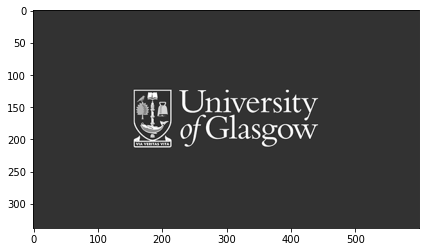

In [9]:
### This is (one way) to open the image to do numerical work on it 
import matplotlib.pyplot as plt

### Load the image from file. Then display it.
test_image = plt.imread("/data/examples/p3/itlab/patterns/glasgow_greyscale.png")
plt.figure(figsize=(12,4))  # Sets the size of the displayed image
plt.imshow(test_image, cmap="gray")  #cmap tells it to plot brightness values as shades of grey

*The first time you run this it will probbaly produce some errors. They should go away if you rerun the cell.*

Let's walk through what we just did.  The image was made by calling functions of `pyplot`. These are like the functions you `def`ine yourself. But to tell Python where to find them they are prefaced with the library name. To use them:
 * We called `import matplotlib.pyplot as plt` to load the `pyplot` functions, and gave them an alias `plt` so we don't have to type `matplotlib.pyplot.` each time.
 * We called the functions `imread()`, `figure()`, and `imshow()`.  They are all prefaced with `plt.` to tell Python that these are from `matplotlib.pyplot` (alias `plt`).
 > Note that the `figsize=(12,8)` argument says how wide and hight the plot should be. But since this is an image Python automatically adjusts the aspect ratio.  You will have more freedom when drawing real plots later.

What you should see is a greyscale image with two axes around it.  If we inspect the data that we made the image from:

In [5]:
print(type(test_image))
print(test_image.shape)

<class 'numpy.ndarray'>
(338, 600)


In the first line, Python is reporting that the image data is stored as an `ndarray`, from the `NumPy` library [(documented here)](https://numpy.org/doc/1.19/reference/generated/numpy.ndarray.html). In the second we see that the shape of the array is 338 (rows) $\otimes$ 600 (columns). Comparing to the displayed image, this does indeed correspond to the size of the image indicated by the axes, with each 1-by-1 'bin' corresponding to a pixel of the image.  

<div class="alert alert-block alert-warning">
<h3>Tweaking the image display</h3>
</div>

 1. There is a colour version of the logo in the same folder called `"glasgow_rgb.png"`.  Write an equivalent section of code to display it, and have a look at the 'shape' of the data to confirm it really does have three RGB colour channels. 

 2. What are the RGB values for the blue background of this image?  
    *Hint: most pixels are blue. In particular, the first pixel in the corner is a background pixel*
 
 2. Although it helped in understanding how python represented the image, it's not normal to plot images with axes.  We can modify some of the attributes of an image by calling other functions using the same `plt.<blah>` syntax. Have a look at the [pyplot documentation](https://matplotlib.org/3.2.2/api/pyplot_summary.html) and see if you can:
  *  Turn off the axis display so you get just the image
  *  Crop the image to remove 100 pixels off all four sides
 
<div class="alert alert-block alert-warning"> </div>


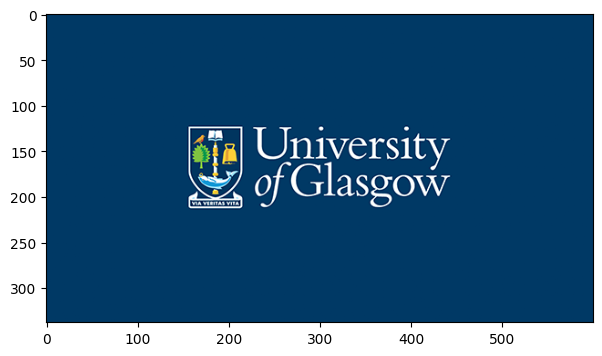

In [2]:
import matplotlib.pyplot as plt

logo = plt.imread("patterns/glasgow_rgb.png")
plt.figure(figsize=(12,4))  # Sets the size of the displayed image
plt.imshow(logo)  #cmap tells it to plot brightness values as shades of grey
plt.show()

## Part 3: Reading in files according to a text pattern

The first thing to do is to list all the files in the directory, for which you can use the `os.listdir` function. This takes the directory path as an argument and returns a list of all directory contents. The trickier part is choosing the correct files to go in each group.

The string type `str` has [some functions](https://docs.python.org/3/library/stdtypes.html#string-methods) to help with parsing. These include `startswith()`, `endswith()`, `find()` and `split()` functions, e.g. `"mystring".endswith("ing")`. Using these and other string methods you can pick out which files you want to read in and which ones to skip.

A short demo on navigating directories is provided below.

In [3]:
import os
print(os.listdir()) #os.listdir() returns a list of strings containg files in the current directory if no arguments provided
print(os.listdir("patterns")) #or you can provide it a path realative to the directory the notebook is in
print(os.listdir("/data/examples/p3/itlab/patterns")) #or you can provide an absolute path to the examples directory

['.DS_Store', 'patterns', '2-bungeejump.ipynb', '3-neutrinofit.ipynb', '.ipynb_checkpoints', '1-patternmatching.ipynb']
['hidden_6370.png', 'bix_hidden_i6.png', 'hidden_4119.png.download', '.DS_Store', 'tnw_hidden_x0.png.download', 'qqe_hidden_e9.png.download', 'hidden_2503.png', 'hidden_7342.png.download', 'liy_hidden_i6.png.download', 'hidden_8250.png.download', 'tgm_hidden_j0.png.download', 'glasgow_rgb.png', 'glasgow_greyscale.png', 'left.png', 'irh_hidden_q9.png.download', 'hidden_1503.png', 'bge_hidden_d1.png', 'soho_left.png', 'hidden_8169.png.download', 'text_file.txt', 'hidden_5276.png', 'hidden_0905.png', 'dcy_hidden_h5.png', 'hidden_5703.png', 'right.png', 'soho_right.png']


FileNotFoundError: [Errno 2] No such file or directory: '/data/examples/p3/itlab/patterns'

In [7]:
# Prints out all filenames that start with the word "hidden" in the patterns folder.
for filename in os.listdir("patterns/"):
    if filename.startswith("hidden"):
        print(filename)

hidden_0905.png
hidden_1503.png
hidden_2503.png
hidden_4119.png
hidden_5276.png
hidden_5703.png
hidden_6370.png
hidden_7342.png
hidden_8169.png
hidden_8250.png


### A different approach: regular expressions

A more powerful solution is to use **regular expressions**, also known as "regexes". Regexes are a miniature programming language in their own right, specifically for matching patterns in text. They provide a robust way to perform string operations (matchings, substitutions, etc.).

Regular expressions are provided in Python via the **re** library. You should take a good look at the [Python documentation](https://docs.python.org/3/library/re.html) before you start writing anything -- regex syntax is not immediately obvious! A key element is its wildcard characters, which represent whole sets of specific characters, e.g. `\d` for a digit, `\w` for a word character, `.` for anything at all. Another good resource is [RegEx101](https://regex101.com/), an online tool for quickly testing expressions with explanations of what's happening.

A few simple examples are given below:

In [34]:
import re

words = ["cats", "cat", "catcat", "dog", "dogs", "University", "dictionary", "Universe"]

# Note: the pattern string must be fully present in the word to match, and capitalization matters.
# These examples don't use important RE elements like repetition operators, which you should look into.
for word in words:
    if re.match("dog", word):
        print("cat matches with {}".format(word))
    if re.match("cats", word):
        print("cats matches with {}".format(word))
    if re.match("Univ", word):
        print("Univ matches with {}".format(word))
    if re.match("univ", word):
        print("univ matches with {}".format(word))


cats matches with cats
cat matches with dog
cat matches with dogs
Univ matches with University
Univ matches with Universe


<div class="alert alert-block alert-success">
    <h3>Computing task: Hidden instructions</h3>
</div>

The `patterns` folder contains a number of .png images. You will need make two separate groups of images, and add each group together to access instructions for the next part of the exercise. 

Each group has a unique naming convention. The file names in Group 1 are of the form `hidden_xxxx` while the file names in Group 2 are of the form `yyy_hidden_yx`, where `x` represents a random digit and `y` represents a random letter.  (There are also some image files that are part of neither group)

Using either name-matching method described above, read in the images in Group 1 and Group 2. Now create two composite images by adding together all the files in each group -- take a look at these images so you know what you're working with -- and finally take the difference between the two composite images to get instructions for the next part of the exercise.<BR>
*If you are having trouble reading the instructions, try using the `plt.set_cmap()` function to set a different colourmap from the list [here](https://matplotlib.org/stable/gallery/color/colormap_reference.html). Anecdotally, taking the `abs()` of the difference can also help.*
    
<div class="alert alert-block alert-success">
</div>

['bix_hidden_i6.png', '.DS_Store', 'tgm_hidden_j0.png', 'irh_hidden_q9.png', 'liy_hidden_i6.png', 'bge_hidden_d1.png', 'tnw_hidden_x0.png', 'qqe_hidden_e9.png', 'dcy_hidden_h5.png']


UnidentifiedImageError: cannot identify image file 'patterns/group_2/.DS_Store'

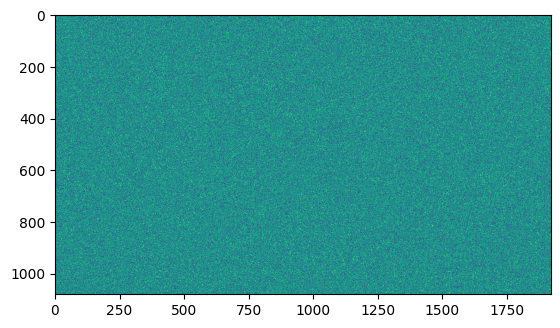

In [75]:
import re
import matplotlib.pyplot as plt
import numpy as np
import os

# use os to move files around
files = os.listdir("patterns/")

for file in files:
    if re.search("hidden", file):
        print(file)
        os.rename("patterns/"+file, "patterns/group_2/"+file)

group_1 = os.listdir("patterns/group_1/")
group_2 = os.listdir("patterns/group_2/")
print(group_2)
for i in range(len(group_1)):
    plt.imshow(plt.imread("patterns/group_1/"+group_1[i]))
for i in range(len(group_2)):

    plt.imshow(plt.imread("patterns/group_2/"+group_2[i]))

<div class="alert alert-block alert-warning">
    <h3>How general is your solution?</h3>
</div>

There are two more images in the patterns folder: `soho_left.png` and `soho_right.png`, that are an approximate map of the surface temperature of the sun from the [SOHO](https://sohowww.nascom.nasa.gov/) data.  See if your solution to the second part works for these images too.

<div class="alert alert-block alert-warning"> </div>